## Неделя 3. Среда
### Временные ряды

В этом задании тебе предстоит проанализировать продажи разных категорий товаров. Сначала это стоит сделать для одной категории, потом можно попробовать для других. 

1. Загрузи [датасет](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls) и распечатай первые 10 строк. 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
plt.style.use('seaborn-v0_8')

In [51]:
df = pd.read_excel('aux/Sample - Superstore.xls')
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


Сделай выбоорку по категории товара (используй популярную категорию: например, `Furniture`) и запиши в переменную `data`. Распечатай первые 10 строк. 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [53]:
data = df[df.Category == 'Furniture']
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
29,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


2. Визуализируй данные:
    * по исходному целевому столбцу (`Sales`)
    * усреднить просуммировать по разным периодам (неделя, месяц, квартал, полугодие)

In [54]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


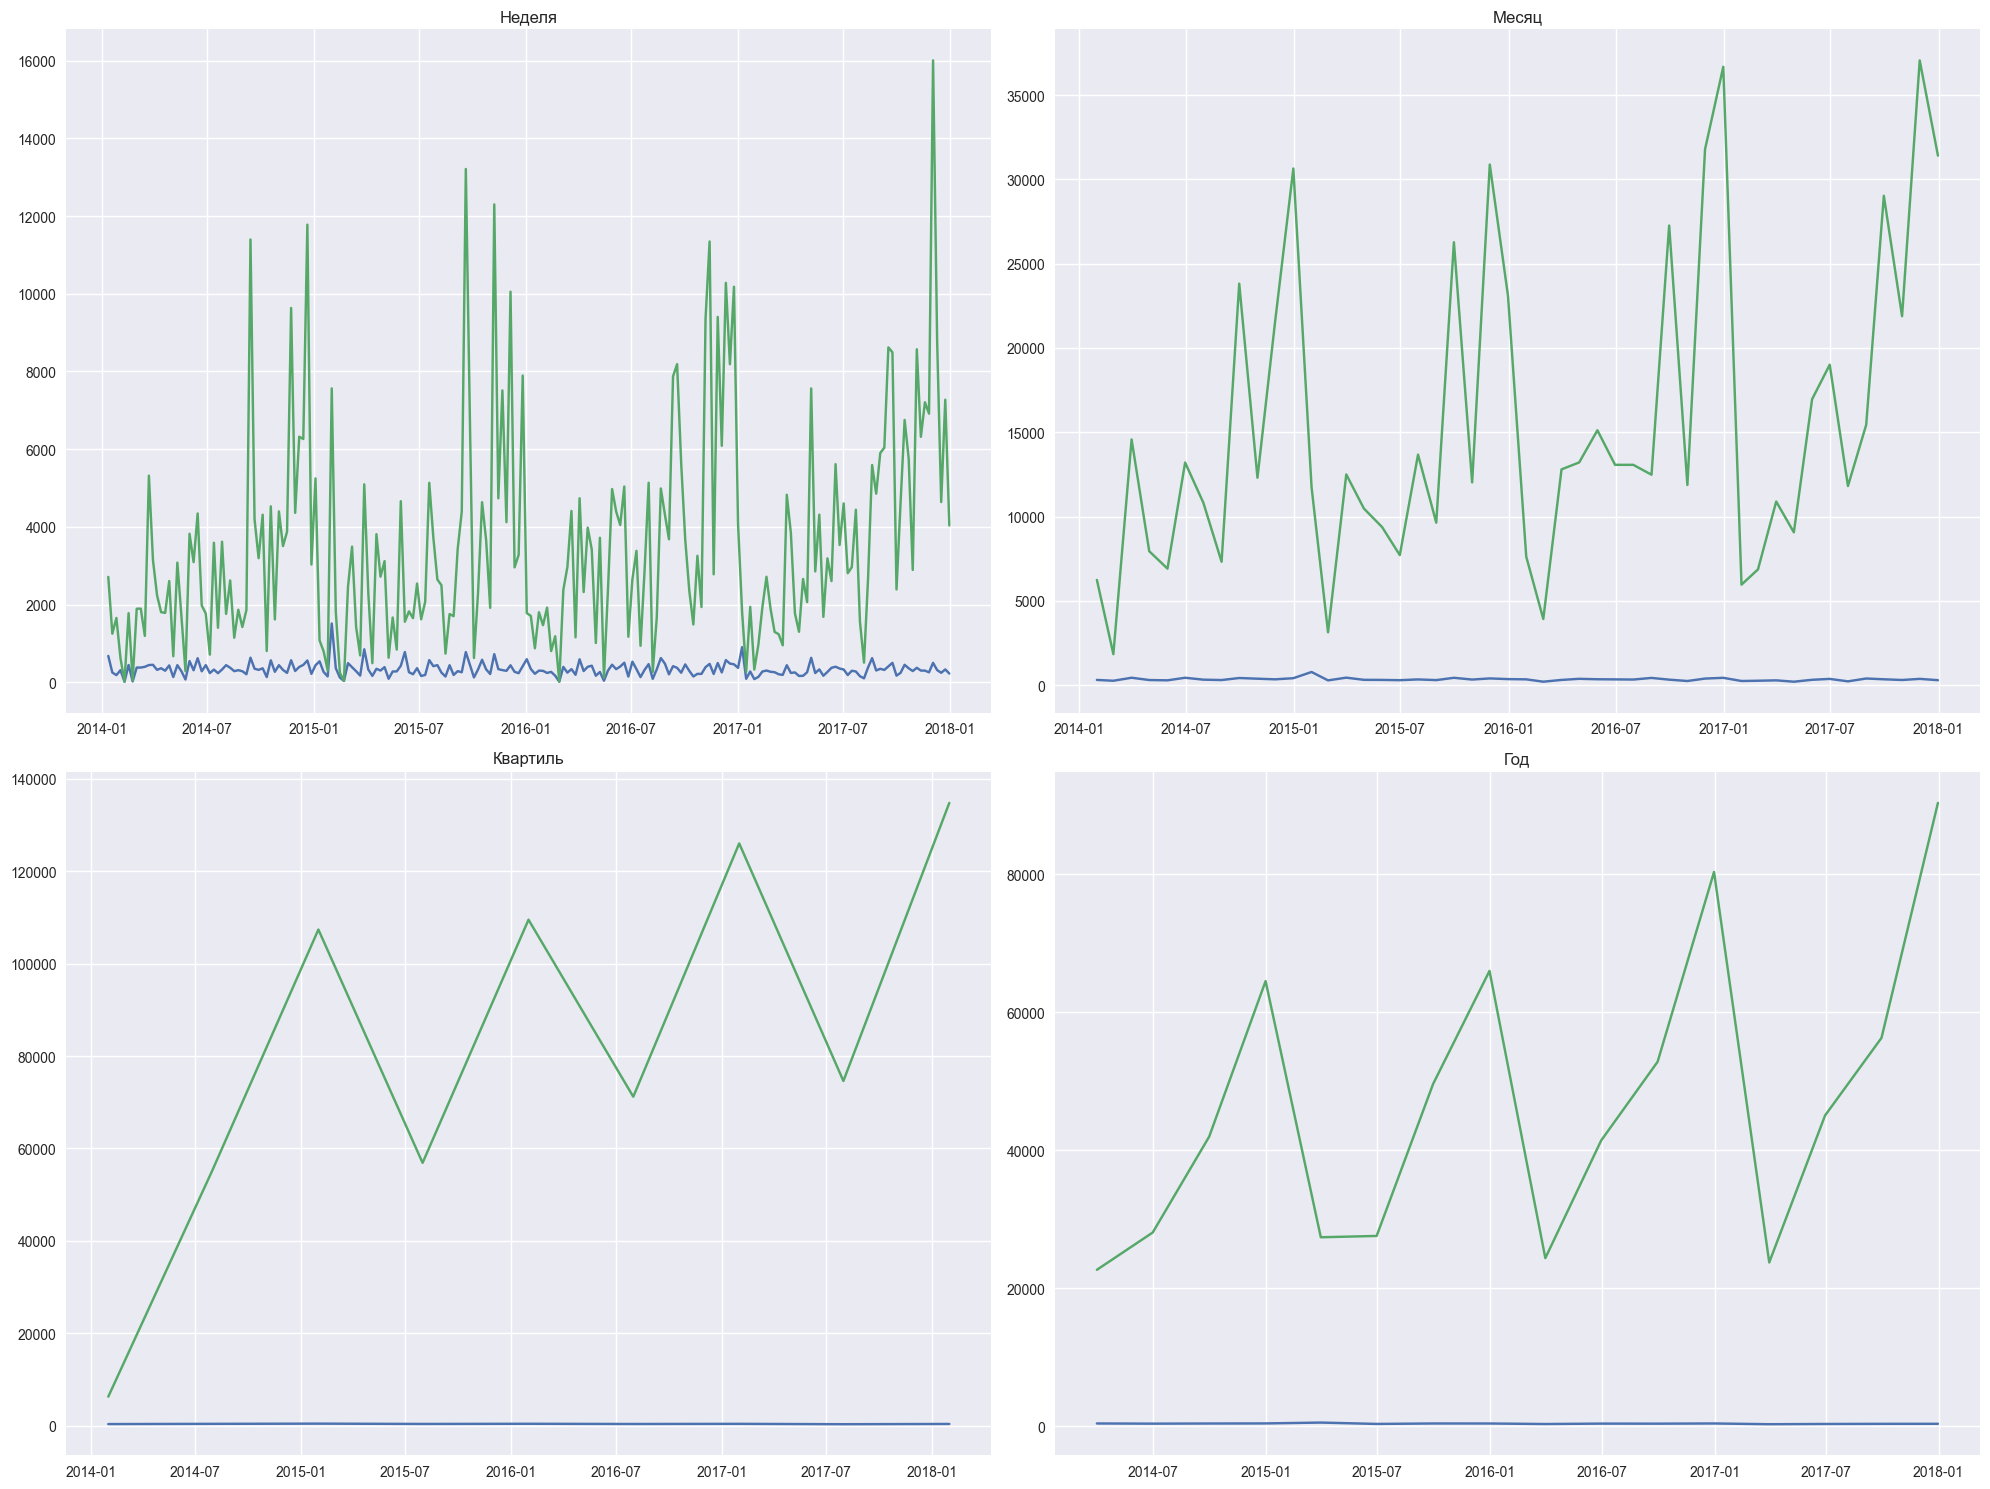

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax = ax.ravel()

periods = ['W', 'M', '6M', 'Q']
text_per = ['Неделя', 'Месяц', 'Квартиль', 'Год']

for ind, per in enumerate(periods):
    ax[ind].plot(data.resample(per, on='Order Date').agg({'Sales': ['mean', 'sum']}))
    ax[ind].set_title(text_per[ind])
    
plt.tight_layout()
plt.show()

2.1 В качестве анализа необходимо взять временной ряд по __неделям__, и анализировать __сумму__. 

3. Построй визуализации:
* скользящего среднего


In [56]:
data.index.dtype

dtype('int64')

In [57]:
data.index = pd.to_datetime(data['Order Date'])

In [58]:
data['Sales'] = data['Sales'].resample('W').sum()

In [59]:
data.Sales.isna().sum()

np.int64(1768)

In [60]:
data.sort_index(inplace=True)

MSE 2011.42
R2 0.31


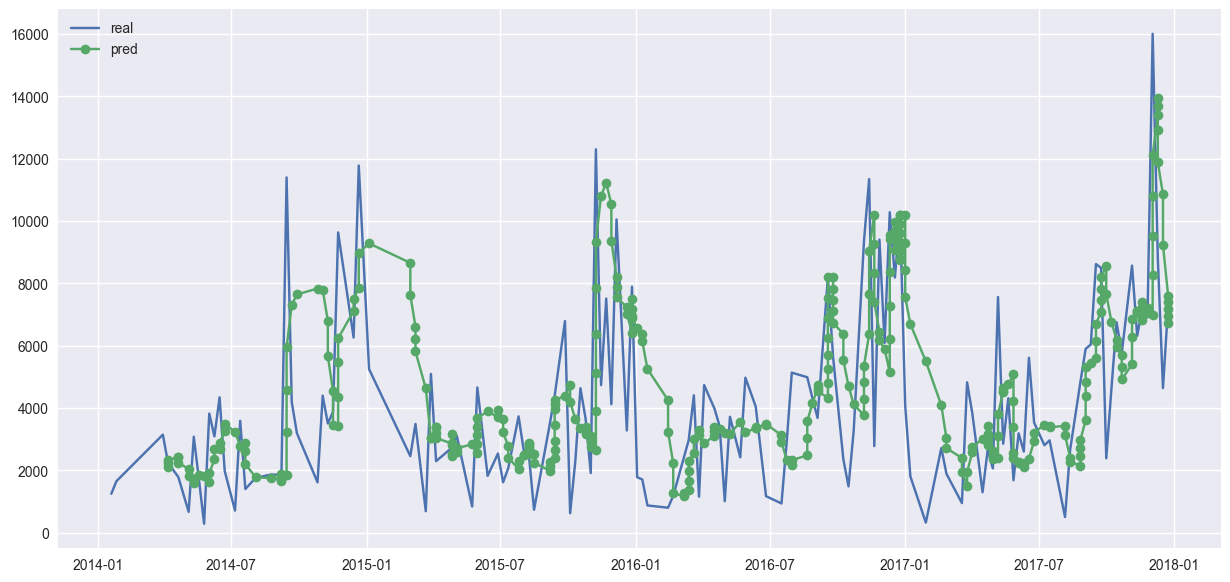

In [61]:
from sklearn.metrics import mean_absolute_error, r2_score
n_window = 7

data.dropna(inplace=True)
moving_average_pred = data.Sales.rolling(window=n_window, closed='left').mean()
moving_average_mae = np.round(mean_absolute_error(data['Sales'][n_window:], moving_average_pred[n_window:]), 2)
moving_average_r2 = np.round(r2_score(data['Sales'][n_window:], moving_average_pred[n_window:]), 2)
print(f'MSE {moving_average_mae}')
print(f'R2 {moving_average_r2}')

plt.figure(figsize=(15, 7))
plt.plot(data['Sales'], label='real')
plt.plot(moving_average_pred, label='pred', marker='o')
plt.legend()


In [62]:
n_windows = range(1, 15)

for n in n_windows:
    rolling_pred = pd.DataFrame({
        'act': data['Sales'],
        'pred': data['Sales'].rolling(window=n, closed='left').mean()
    })
    mae = np.round(mean_absolute_error(data['Sales'][n:], rolling_pred['pred'][n:]), 2)
    r2 = np.round(r2_score(data['Sales'][n:], rolling_pred['pred'][n:]), 2)
    print(f'MAE с {n} окон = {mae}')
    print(f'R2 с {n} окон = {r2}')
    

MAE с 1 окон = 971.97
R2 с 1 окон = 0.62
MAE с 2 окон = 1311.5
R2 с 2 окон = 0.54
MAE с 3 окон = 1530.74
R2 с 3 окон = 0.47
MAE с 4 окон = 1700.05
R2 с 4 окон = 0.41
MAE с 5 окон = 1836.13
R2 с 5 окон = 0.37
MAE с 6 окон = 1940.89
R2 с 6 окон = 0.34
MAE с 7 окон = 2011.42
R2 с 7 окон = 0.31
MAE с 8 окон = 2065.34
R2 с 8 окон = 0.28
MAE с 9 окон = 2098.26
R2 с 9 окон = 0.26
MAE с 10 окон = 2108.06
R2 с 10 окон = 0.26
MAE с 11 окон = 2109.08
R2 с 11 окон = 0.25
MAE с 12 окон = 2109.51
R2 с 12 окон = 0.25
MAE с 13 окон = 2115.9
R2 с 13 окон = 0.25
MAE с 14 окон = 2110.11
R2 с 14 окон = 0.24



* взвешенного скользящего среднего


In [63]:
def weighted_moving_average(x, n, weights):
    weights = np.array(weights, dtype=float)

    return x.rolling(window=n).apply(
        lambda w: np.dot(w, weights) / weights.sum(),
        raw=True
    )

MAE = 433.46
r2 = 0.95


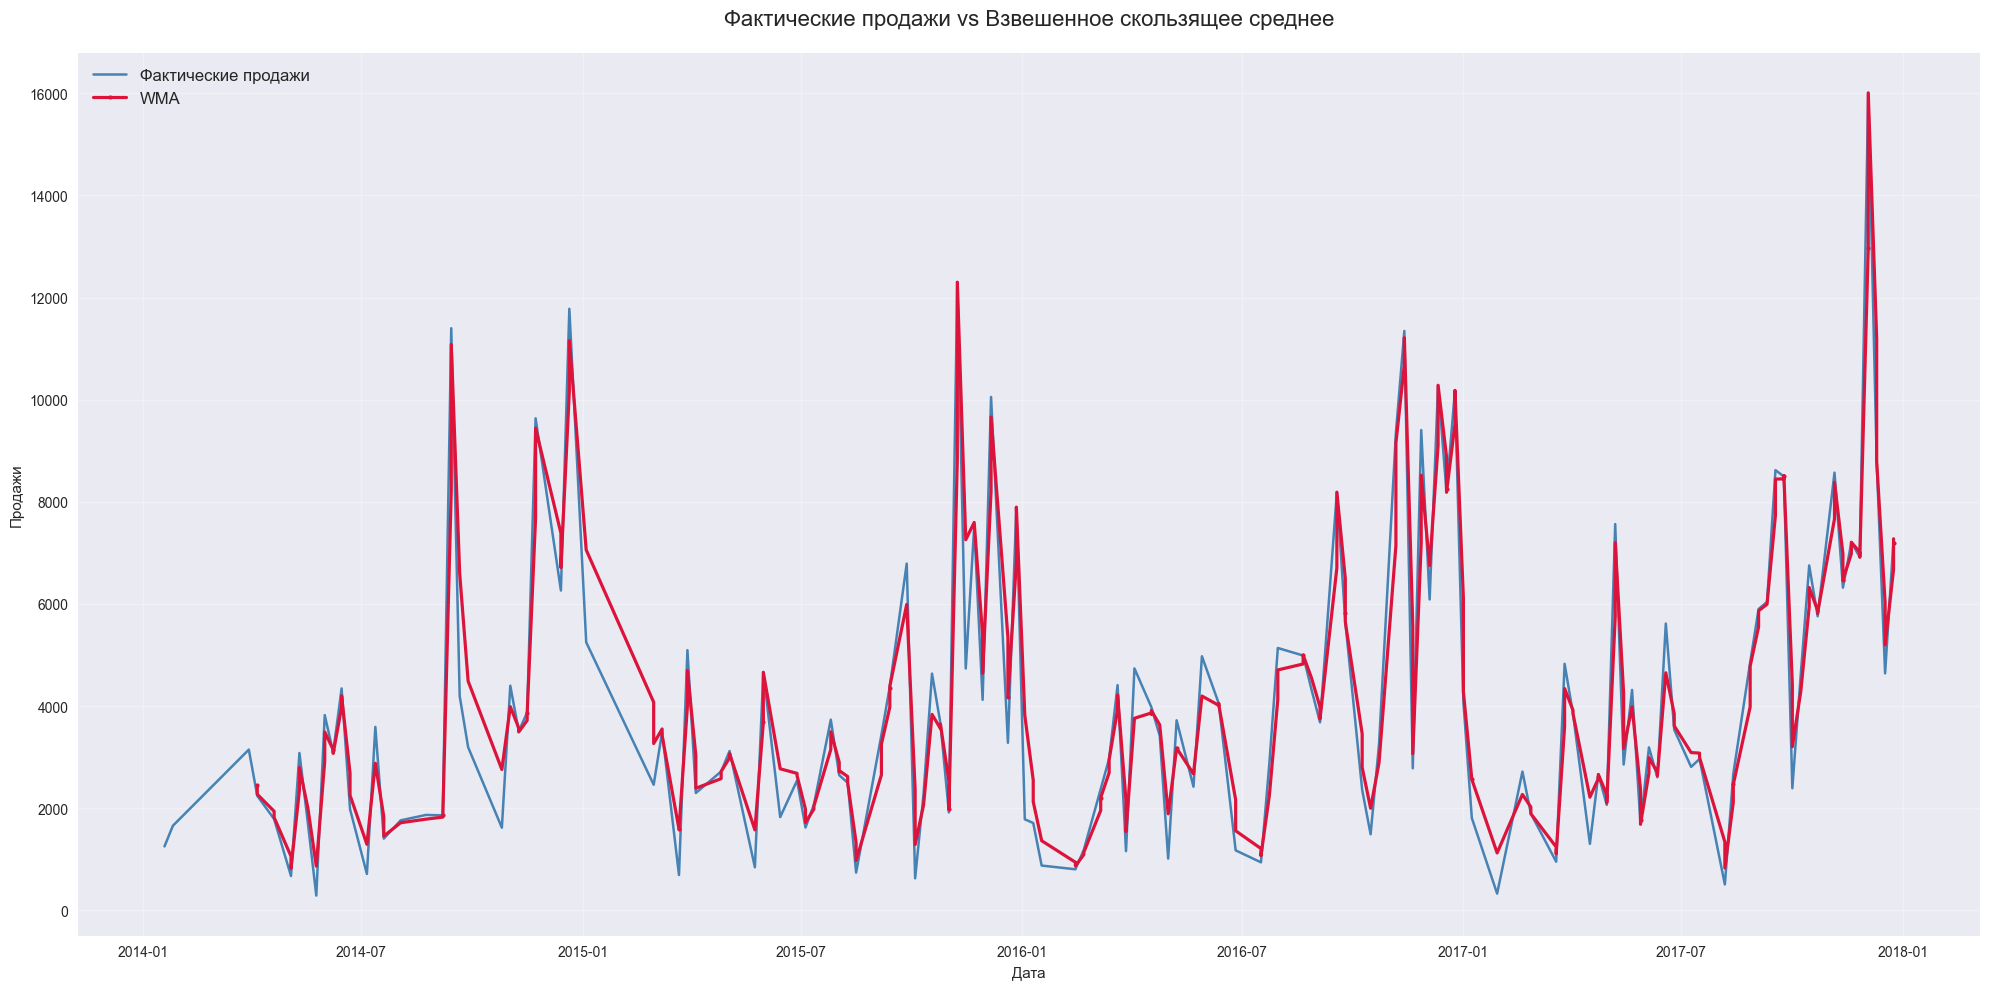

In [64]:
n_window = 7

weight = [0.0, 0.0, 0.1, 0.1, 0.2, 0.6, 2.0]
weighted_moving_average_pred = weighted_moving_average(data['Sales'], n=n_window, weights=weight)

weighted_moving_average_mae = np.round(
    mean_absolute_error(
        data['Sales'][n_window:],
        weighted_moving_average_pred[n_window:]), 
        2)

weighted_moving_average_r2 = np.round(
    r2_score(
        data['Sales'][n_window:],
        weighted_moving_average_pred[n_window:]), 
        2)

print(f'MAE = {weighted_moving_average_mae}')
print(f'r2 = {weighted_moving_average_r2}')

valid = weighted_moving_average_pred.notna()

plt.figure(figsize=(20, 10))
plt.plot(data.index, data['Sales'], label='Фактические продажи', color='steelblue', linewidth=1.8)

# Рисуем предсказание только там, где оно есть (чтобы не было NaN в начале)
plt.plot(data.index[valid], weighted_moving_average_pred[valid],
         label=f'WMA', 
         color='crimson', 
         linewidth=2.3,
         marker='o', markersize=3, markevery=15)  # маркеры не на каждой точке, а пореже

plt.title('Фактические продажи vs Взвешенное скользящее среднее', fontsize=16, pad=20)
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Какие выводы можно сделать по скользящим линиям? Что они показывают?

Модель со скользящим средним хуже среднего, плохая модель

Модель с взвешенным скользящим средним отличная, если правильно указать веса  

Тренда нет, наблюдаем остатки и сезонность

4. Декомпозируй данные на тренд, сезонность и остатки. 

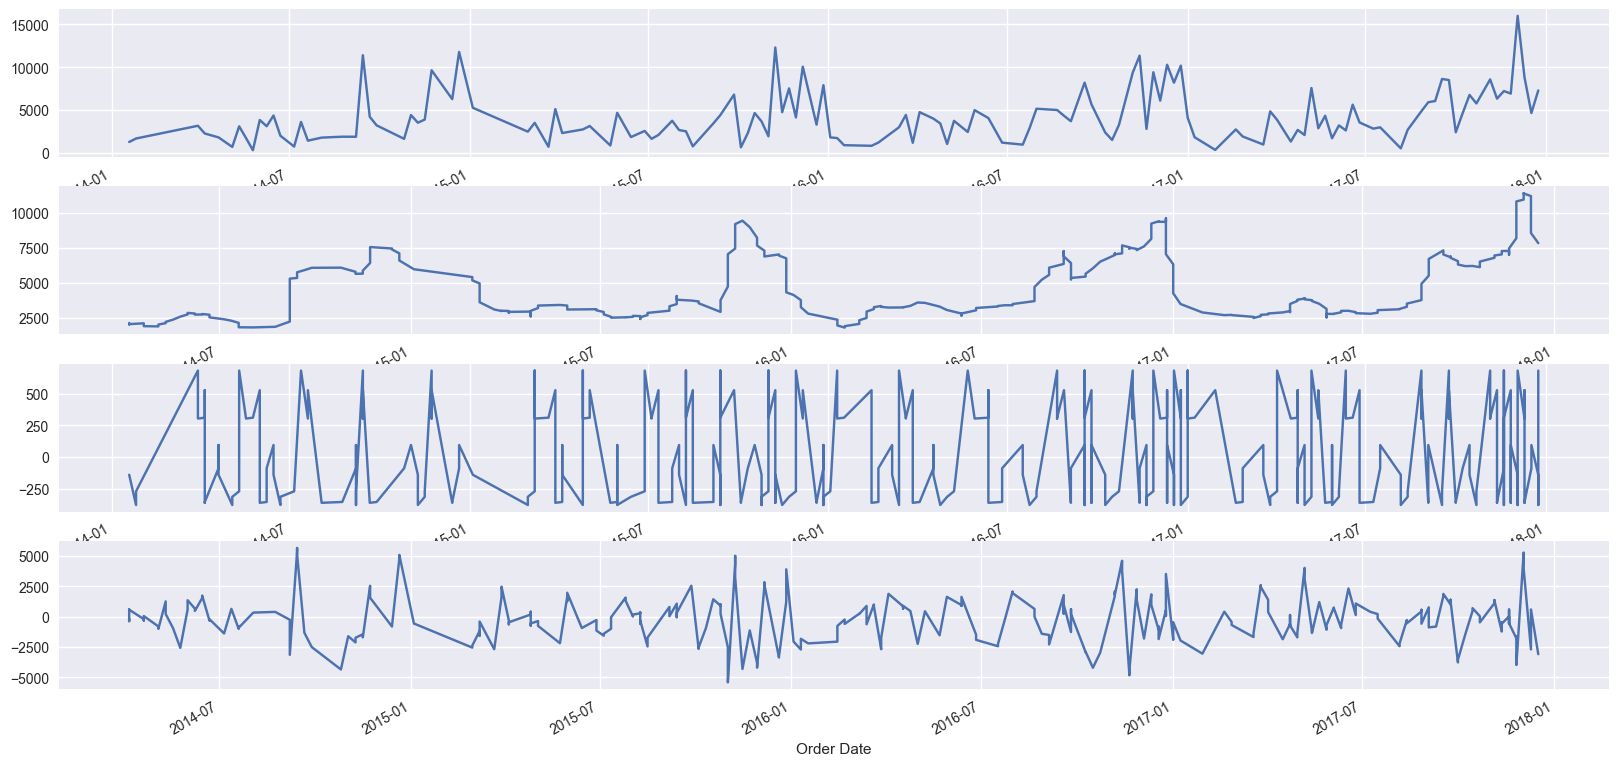

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose


fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(20,10))

res = seasonal_decompose(data['Sales'], period=12)
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)

plt.show();

# ❓
Прокомментируй графики: какой вывод можно сделать? Есть ли в данных сезонность? Какой тренд преобладает? Какого масштаба ошибки по сравнению со значениями основного временного ряда?


Можно увидеть небольшой тренд. 
Присутствует сезонность. 

У остатков есть размах от -5000 до +5000

5. Построй графики автокорреляционной функции и частичной автокорреляционной функции. 

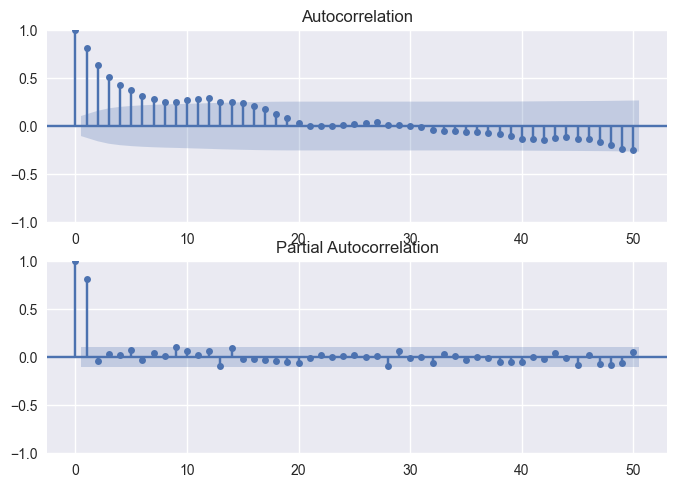

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1)
n_lags = 50
acf = plot_acf(data['Sales'], ax=ax1, lags=n_lags)
pacf = plot_pacf(data['Sales'], ax=ax2, lags=n_lags)

# ❓
Какие выводы можно сделать на основе этих графиков?

Нестационарный временный ряд, сезонная нестационарность

6. Постройте и визуализируйте модель класса ARIMA

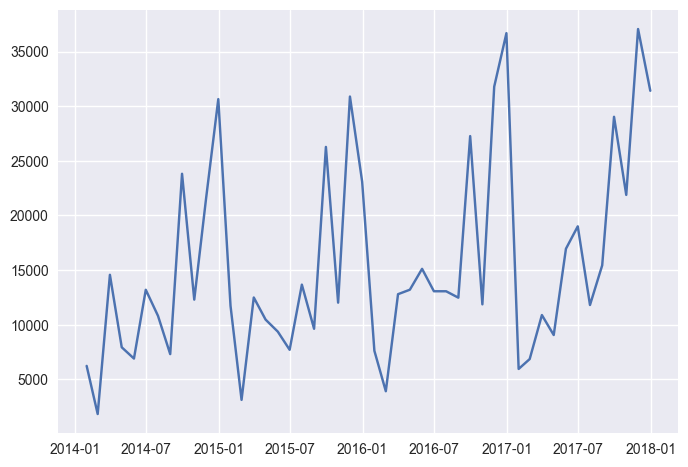

In [67]:
from statsmodels.tsa.ar_model import AutoReg

data = df[df.Category == 'Furniture']
data.index = pd.to_datetime(data['Order Date'])
data = data['Sales'].resample('M').sum()

plt.plot(data)

In [68]:
data.index.size

48

In [69]:
48 * 0.8

38.400000000000006

In [70]:
date_idx = 38

data_train = data.iloc[:date_idx]
data_test = data.iloc[date_idx:]

print(len(data_train), len(data_test))

38 10


In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (0, 1, 1)
seasonal_order = (1, 0, 0, 12)

sar = SARIMAX(data_train, order=order, seasonal_order=seasonal_order, 
              enforce_invertibility=False, enforce_stationarity=False).fit(disp=False)

forecast = sar.get_forecast(steps=len(data_test))
forecast_val = forecast.predicted_mean

sar_mae = np.round(mean_absolute_error(data_test, forecast_val), 1)
sar_r2 = np.round(r2_score(data_test, forecast_val), 3)

print(f'SARIMAX: \nMSE {sar_mae}')
print(f'R2 {sar_r2}')

sar_pred_train = sar.fittedvalues
forecast_future = sar.get_forecast(steps=30)
sar_pred_future = forecast_future.predicted_mean

SARIMAX: 
MSE 3781.1
R2 0.753


In [72]:
display('Веса авторегрессии')
sar.params

'Веса авторегрессии'

ma.L1      -1.086552e+00
ar.S.L12    7.994547e-01
sigma2      3.331066e+07
dtype: float64

SARIMAX: 
MSE 3781.1
R2 0.753


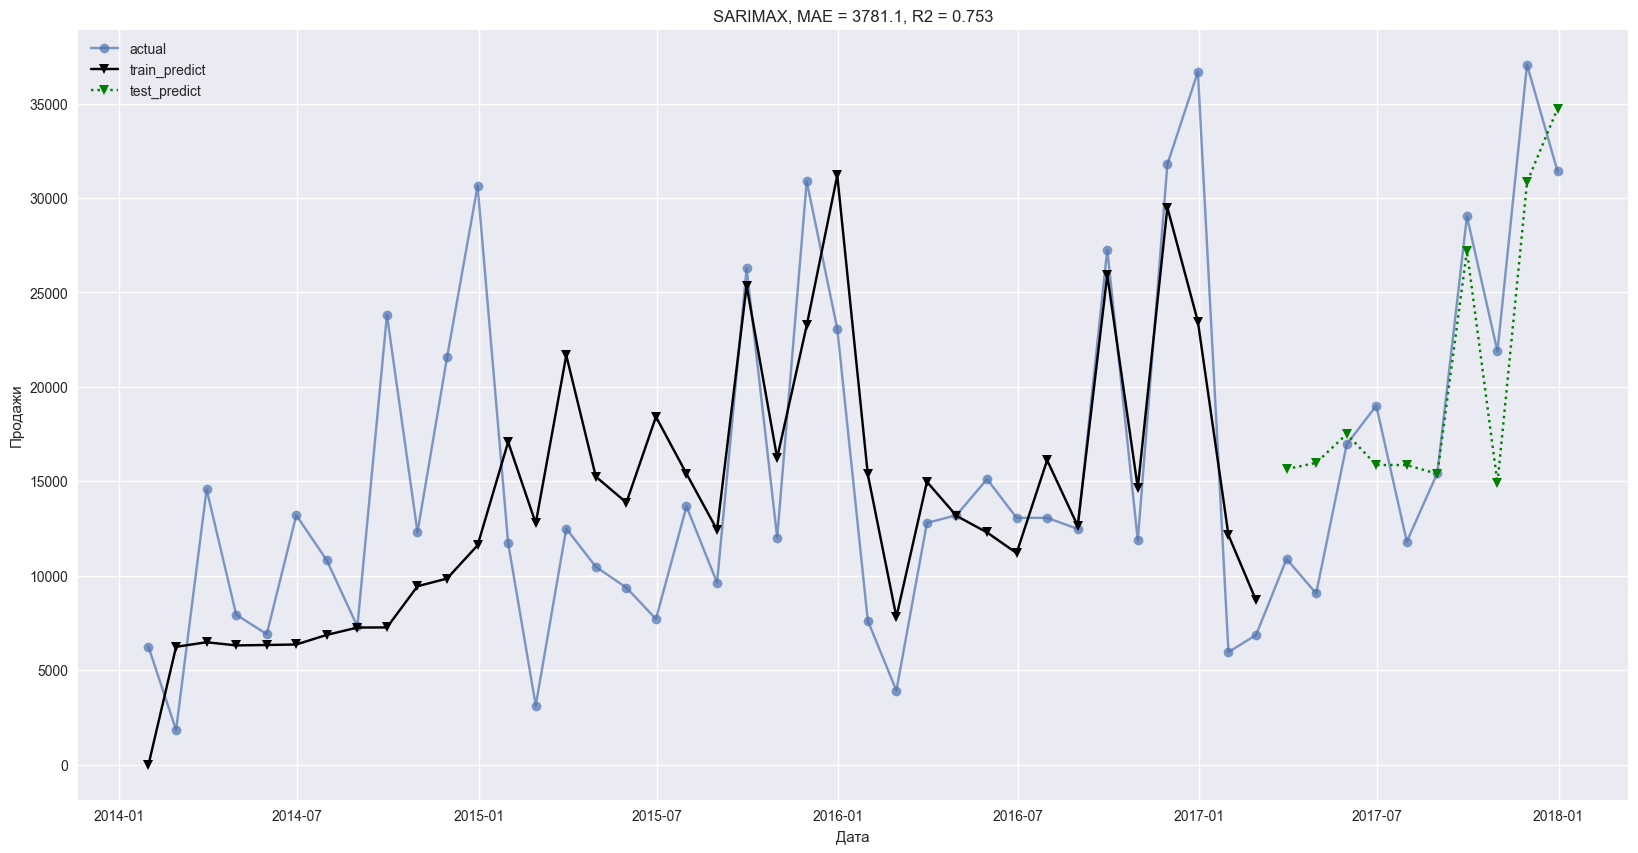

In [73]:
print(f'SARIMAX: \nMSE {sar_mae}')
print(f'R2 {sar_r2}')

plt.figure(figsize=(20, 10))

# Реальные значения (весь набор)
plt.plot(data.index, data, label='actual', marker='o', alpha=0.7)

# Прогноз на обучение
plt.plot(data_train.index, sar_pred_train, marker='v', color='k', label='train_predict')

# Прогноз на тест
plt.plot(data_test.index, forecast_val, marker='v', color='g', label='test_predict', linestyle=':')

# Если нужно — прогноз на будущее
# if 'sar_pred_future' in locals():
#     plt.plot(sar_pred_future.index, sar_pred_future, marker='^', color='r', label='future_predict', linestyle='--')

plt.legend()
plt.title(f'SARIMAX, MAE = {sar_mae}, R2 = {sar_r2}')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()

In [74]:
data = df[df.Category == 'Furniture']
data.index = pd.to_datetime(data['Order Date'])
data = data['Sales'].resample('M').sum()

date_idx = 38

data_train = data.iloc[:date_idx]
data_test = data.iloc[date_idx:]

print(len(data_train), len(data_test))

38 10


In [75]:
lags = 13

ar = AutoReg(data_train, lags=lags).fit()

seasonality_period = 12

ar_pred_train = ar.fittedvalues # предсказания для train

ar_pred = ar.forecast(len(data_test) + 3 * seasonality_period) # Предсказание для тестовых точек + еще на 3 сезона вперед
ar_pred_test, ar_pred_future = ar_pred[:len(data_test)], ar_pred[len(data_test):]

ar_mae = np.round(mean_absolute_error(data_test, ar_pred_test), 3)
ar_r2 = np.round(r2_score(data_test, ar_pred_test), 3)

print(f'ARIMA \nMSE {ar_mae}')
print(f'R2 {ar_r2}')

ARIMA 
MSE 5269.202
R2 0.481


In [76]:
display('Веса авторегрессии')
ar.params

'Веса авторегрессии'

const       -16171.560386
Sales.L1        -0.201045
Sales.L2         0.037254
Sales.L3         0.053320
Sales.L4         0.040617
Sales.L5         0.165101
Sales.L6         0.081743
Sales.L7         0.167336
Sales.L8         0.211008
Sales.L9         0.061230
Sales.L10        0.032979
Sales.L11        0.186549
Sales.L12        1.118217
Sales.L13        0.311756
dtype: float64

ARIMA 
MSE 5269.202
R2 0.481


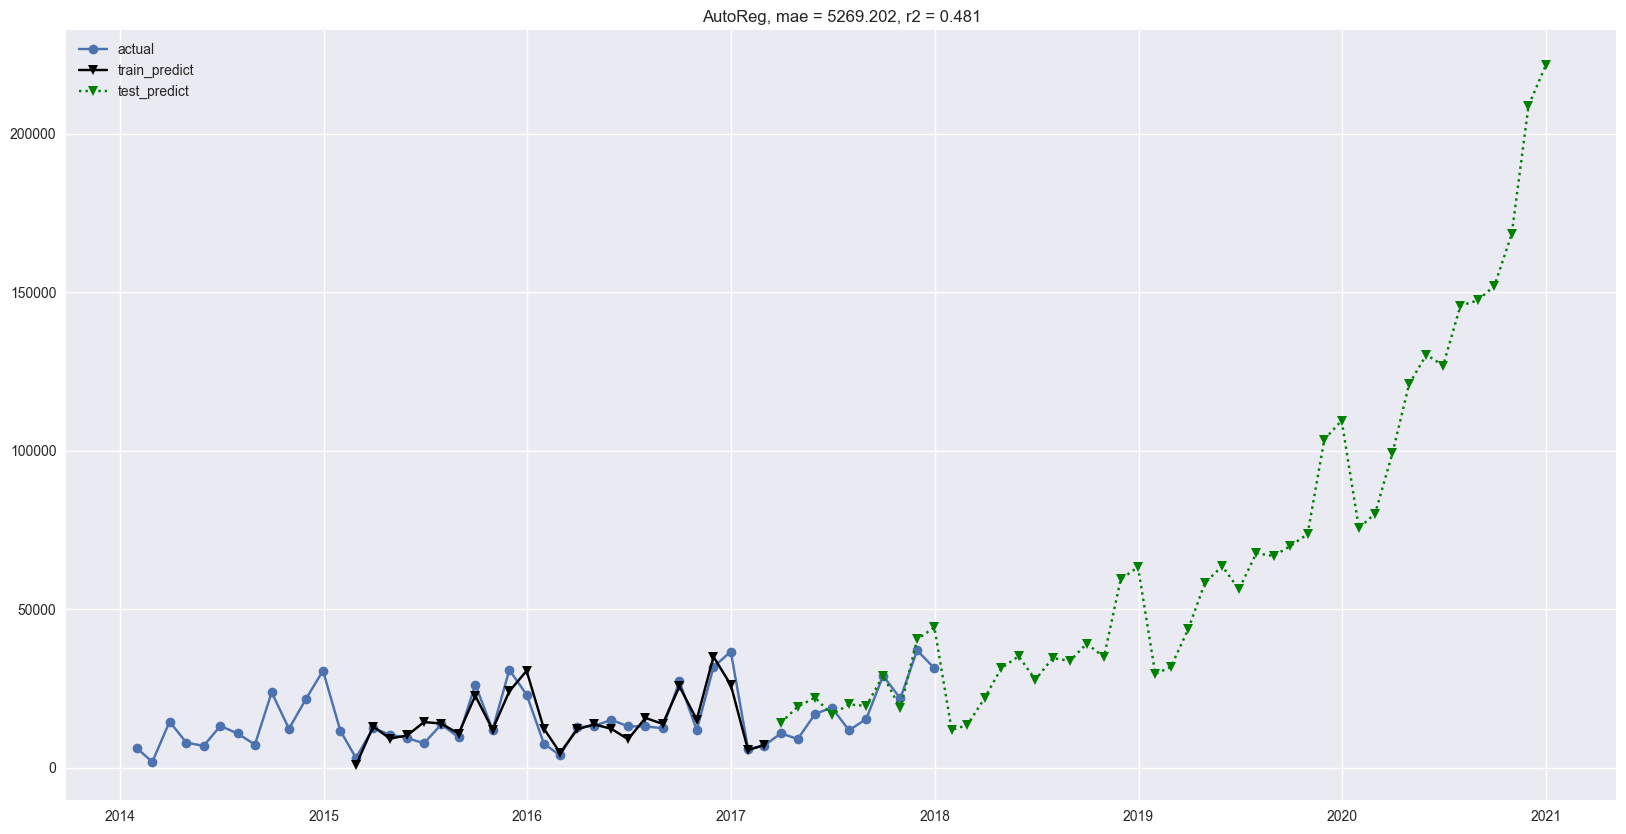

In [77]:
print(f'ARIMA \nMSE {ar_mae}')
print(f'R2 {ar_r2}')

plt.figure(figsize=(20, 10))
plt.plot(data, label='actual', marker='o')
plt.plot(ar_pred_train, marker='v', color='k', label='train_predict')
plt.plot(pd.concat((ar_pred_test, ar_pred_future)), marker='v', color='g', label='test_predict', linestyle=':')
plt.legend()
plt.title(f'AutoReg, mae = {ar_mae}, r2 = {ar_r2}');

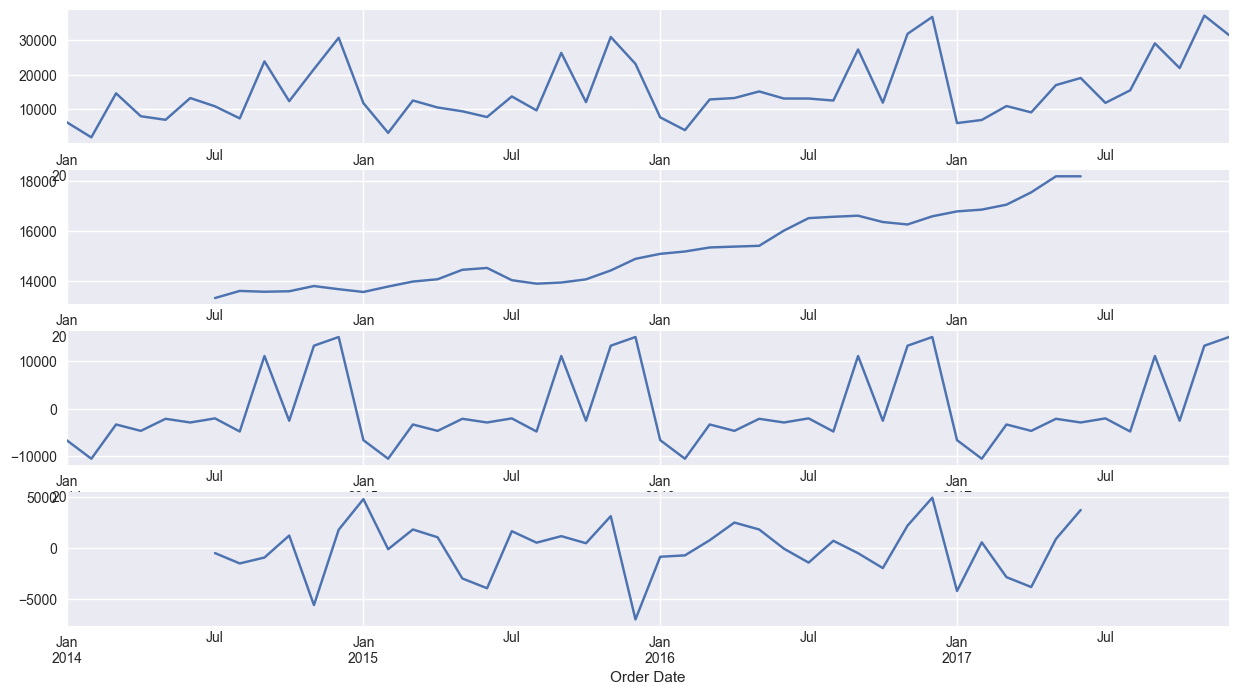

In [78]:
# Функция разложения временного ряда на тренд, компоненты сезонности и остатки (ошибки)
from statsmodels.tsa.seasonal import seasonal_decompose

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
res = seasonal_decompose(data)
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)
plt.show();

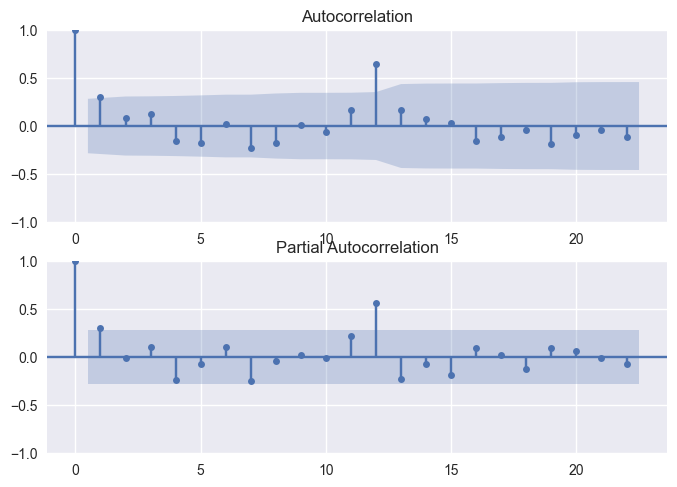

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1)
n_lags = 22
acf = plot_acf(data, ax=ax1, lags=n_lags)
pacf = plot_pacf(data, ax=ax2, lags=n_lags)

7. Постройте и визуализируйте модель prophet. Попробуйте подобрать оптимальные параметры

In [80]:
from prophet import Prophet

data = df[df.Category == 'Furniture']
data.index = pd.to_datetime(data['Order Date'])
data = data['Sales'].resample('M').sum()
data_prophet = data.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})
data_prophet.head()

,ds,y
0,2014-01-31,6242.525
1,2014-02-28,1839.658
2,2014-03-31,14573.956
3,2014-04-30,7944.837
4,2014-05-31,6912.787


In [81]:
data_prophet.index.size

48

In [82]:
48 * 0.8

38.400000000000006

In [83]:
data_train = data_prophet.iloc[:38]
data_test = data_prophet.iloc[38:]

In [84]:
model = Prophet().fit(data_train)

seosanility_period = 12

future_period = 5 * seosanility_period

future = model.make_future_dataframe(periods=future_period, freq='M')
forecast = model.predict(future)

12:15:37 - cmdstanpy - INFO - Chain [1] start processing
12:15:37 - cmdstanpy - INFO - Chain [1] done processing


Prophet 
MSE 4026.7
R2 0.76


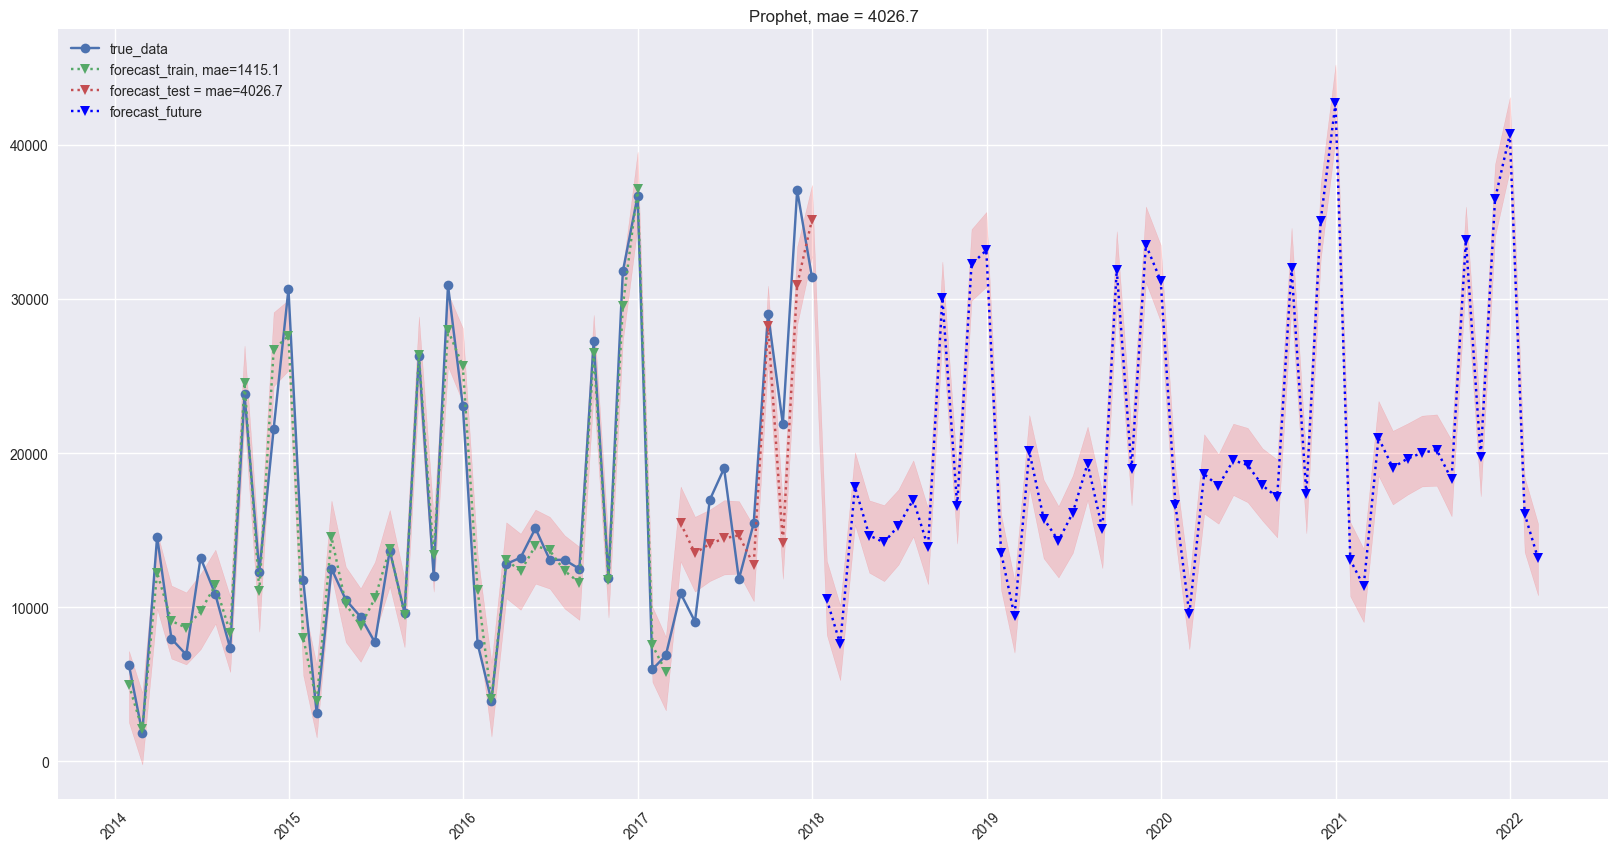

In [85]:
forecast_train = forecast.loc[data_train.index]
forecast_test = forecast[-future_period:-future_period + len(data_test)]
forecast_future = forecast[-future_period + len(data_test):]


prophet_mae_train = np.round(mean_absolute_error(data_train['y'], forecast_train['yhat']), 1)
prophet_mae_test = np.round(mean_absolute_error(data_test['y'], forecast_test['yhat']), 1)
prophet_r2 = np.round(r2_score(data_test['y'], forecast_test['yhat']), 2)

print(f'Prophet \nMSE {prophet_mae_test}')
print(f'R2 {prophet_r2}')

plt.figure(figsize=(20, 10))
plt.plot(data, label='true_data', marker='o')

plt.plot(forecast_train['ds'], forecast_train['yhat'], marker='v', linestyle=':', label=f'forecast_train, mae={prophet_mae_train}')
plt.plot(forecast_test['ds'], forecast_test['yhat'], marker='v', linestyle=':', label=f'forecast_test = mae={prophet_mae_test}')
plt.plot(forecast_future['ds'], forecast_future['yhat'], marker='v', linestyle=':', label='forecast_future', color='b')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.15)
plt.xticks(rotation=45)

plt.title(f'Prophet, mae = {prophet_mae_test}');
plt.legend();


8. Примени регрессионные модели (случайный лес или градиентный бустинг) для прогнозирования целевой величины.
   * Пример есть в демо

In [86]:
# import itertools
# import logging

# logging.getLogger('cmdstanpy').setLevel(logging.ERROR) # Выключение логов

# param_grid = {  
#     'changepoint_prior_scale': list(np.arange(0.01, 0.5, 0.04)),
#     'seasonality_prior_scale': list(np.arange(1, 10, 0.5)),
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# maes = []  # Store the MAEs for each params here

# # Use validation to evaluate all parameters
# for params in all_params:
#     model = Prophet(**params).fit(data_train)  # Обучаем модель с заданными параметрами
#     future = model.make_future_dataframe(periods=future_period, freq='M')  # Создаем фрейм данных для будущего (для тестовой выборки)
#     forecast = model.predict(future)  # Делаем предсказание на будущее
#     forecast_test = forecast[-future_period: -future_period + len(data_test)]
#     prophet_mae_test = np.round(mean_absolute_error(data_test['y'], forecast_test['yhat']), 1)
#     maes.append(prophet_mae_test)  # Добавляем RMSE для данного набора параметров

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['maes'] = maes

In [87]:
# tuning_results.sort_values(by='maes')

In [88]:
# print(data_monthly.dtypes)

In [89]:
from catboost import CatBoostRegressor
data = df[df.Category == 'Furniture']
data.index = data['Order Date']
data.drop(columns=['Order Date'], inplace=True)

# Шаг 3: Агрегация по месяцам (resample)
data_monthly = data.resample('M').agg({'Sales': 'sum'})
data_monthly.index.name = 'Order Date'

# Шаг 4: Создание признаков
data_monthly.reset_index(inplace=True)  # Важно: индекс — дата

# Признаки:
# 1. Лаги
for i in range(1, 13):
    data_monthly[f'lag_{i}'] = data_monthly['Sales'].shift(i)

# 2. Скользящие средние
data_monthly['rolling_mean_3'] = data_monthly['Sales'].rolling(3).mean()
data_monthly['rolling_mean_6'] = data_monthly['Sales'].rolling(6).mean()
data_monthly['rolling_mean_12'] = data_monthly['Sales'].rolling(12).mean()

# 3. Скользящее стандартное отклонение
data_monthly['rolling_std_3'] = data_monthly['Sales'].rolling(3).std()
data_monthly['rolling_std_6'] = data_monthly['Sales'].rolling(6).std()
data_monthly['rolling_std_12'] = data_monthly['Sales'].rolling(12).std()

# 4. Тренд
data_monthly['trend'] = np.arange(len(data_monthly))

# 5. Сезонность (месяц)
data_monthly['month'] = data_monthly['Order Date'].dt.month
data_monthly['year'] = data_monthly['Order Date'].dt.year

# 6. Категориальные признаки (важно для CatBoost)
data_monthly['is_quarter_end'] = (data_monthly['Order Date'].dt.day == 31) | (data_monthly['Order Date'].dt.day == 30)
data_monthly['is_holiday'] = (data_monthly['Order Date'].dt.weekday >= 5)  # Выходные

# 7. Разница между текущим и предыдущим значением
data_monthly['diff_1'] = data_monthly['Sales'].diff(1)

# 8. Процентное изменение
data_monthly['pct_change'] = data_monthly['Sales'].pct_change()
# 9. Максимальное значение за последние 6 месяцев
data_monthly['max_6'] = data_monthly['Sales'].rolling(6).max()

# 10. Минимальное значение за последние 6 месяцев
data_monthly['min_6'] = data_monthly['Sales'].rolling(6).min()

# 11. Разница между максимумом и минимумом
data_monthly['range_6'] = data_monthly['max_6'] - data_monthly['min_6']

# 12. Кодирование месяца (категория)
data_monthly['month_encoded'] = data_monthly['month'].astype('category')

# 13. Кодирование года (категория)
data_monthly['year_encoded'] = data_monthly['year'].astype('category')

# 14. Номер месяца в году
data_monthly['month_number'] = data_monthly['Order Date'].dt.month

# 15. Номер года в последовательности
data_monthly['year_number'] = data_monthly['year'].astype('category').cat.codes

# 18. Признаки из лагов (среднее, медиана, размах)
for i in range(1, 2):
    data_monthly[f'lag_{i}_mean'] = data_monthly[f'lag_{i}'].rolling(3).mean()
    data_monthly[f'lag_{i}_median'] = data_monthly[f'lag_{i}'].rolling(3).median()
    data_monthly[f'lag_{i}_range'] = data_monthly[f'lag_{i}'].rolling(3).max() - data_monthly[f'lag_{i}'].rolling(3).min()

# Шаг 5: Удаление пропусков
data_monthly.dropna(inplace=True)

# Шаг 6: Разделение данных
train_size = int(0.8 * len(data_monthly))
data_train = data_monthly[:train_size]
data_test = data_monthly[train_size:]

# Шаг 7: Признаки и целевая переменная
X_train = data_train.drop(columns=['Sales', 'Order Date'])
y_train = data_train['Sales']
X_test = data_test.drop(columns=['Sales', 'Order Date'])
y_test = data_test['Sales']

# Шаг 8: Обучение модели
model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.1,
    depth=1,
    random_seed=42,
    verbose=False,
    eval_metric='MAE',
    cat_features=['month', 'year', 'month_encoded', 'year_encoded', 'is_quarter_end', 'is_holiday']
)

model.fit(X_train, y_train)

# Шаг 9: Прогноз
forecast = model.predict(X_test)

# Шаг 10: Оценка качества
mae = mean_absolute_error(y_test, forecast)
r2 = r2_score(y_test, forecast)

print(f'CatBoost \nMAE = {mae:.2f}')
print(f"R2 = {r2:.2f}")

CatBoost 
MAE = 2145.62
R2 = 0.83


CatBoost 
MAE = 2145.62
R2 = 0.83


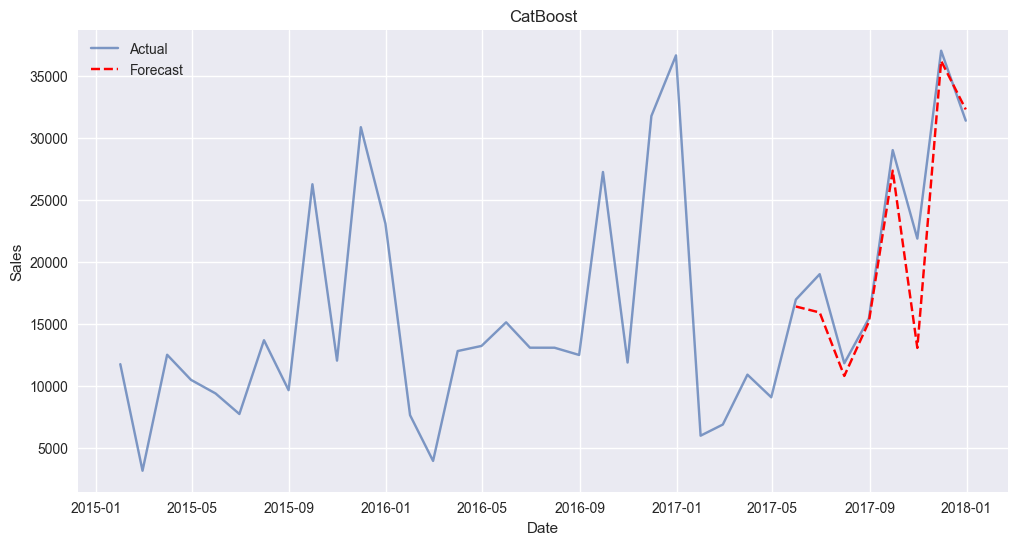

In [90]:
print(f'CatBoost \nMAE = {mae:.2f}')
print(f"R2 = {r2:.2f}")
# Шаг 11: Визуализация
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(data_monthly['Order Date'], data_monthly['Sales'], label='Actual', alpha=0.7)

# Прогноз на тесте
plt.plot(data_test['Order Date'], forecast, label='Forecast', color='red', linestyle='--')

plt.title('CatBoost')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

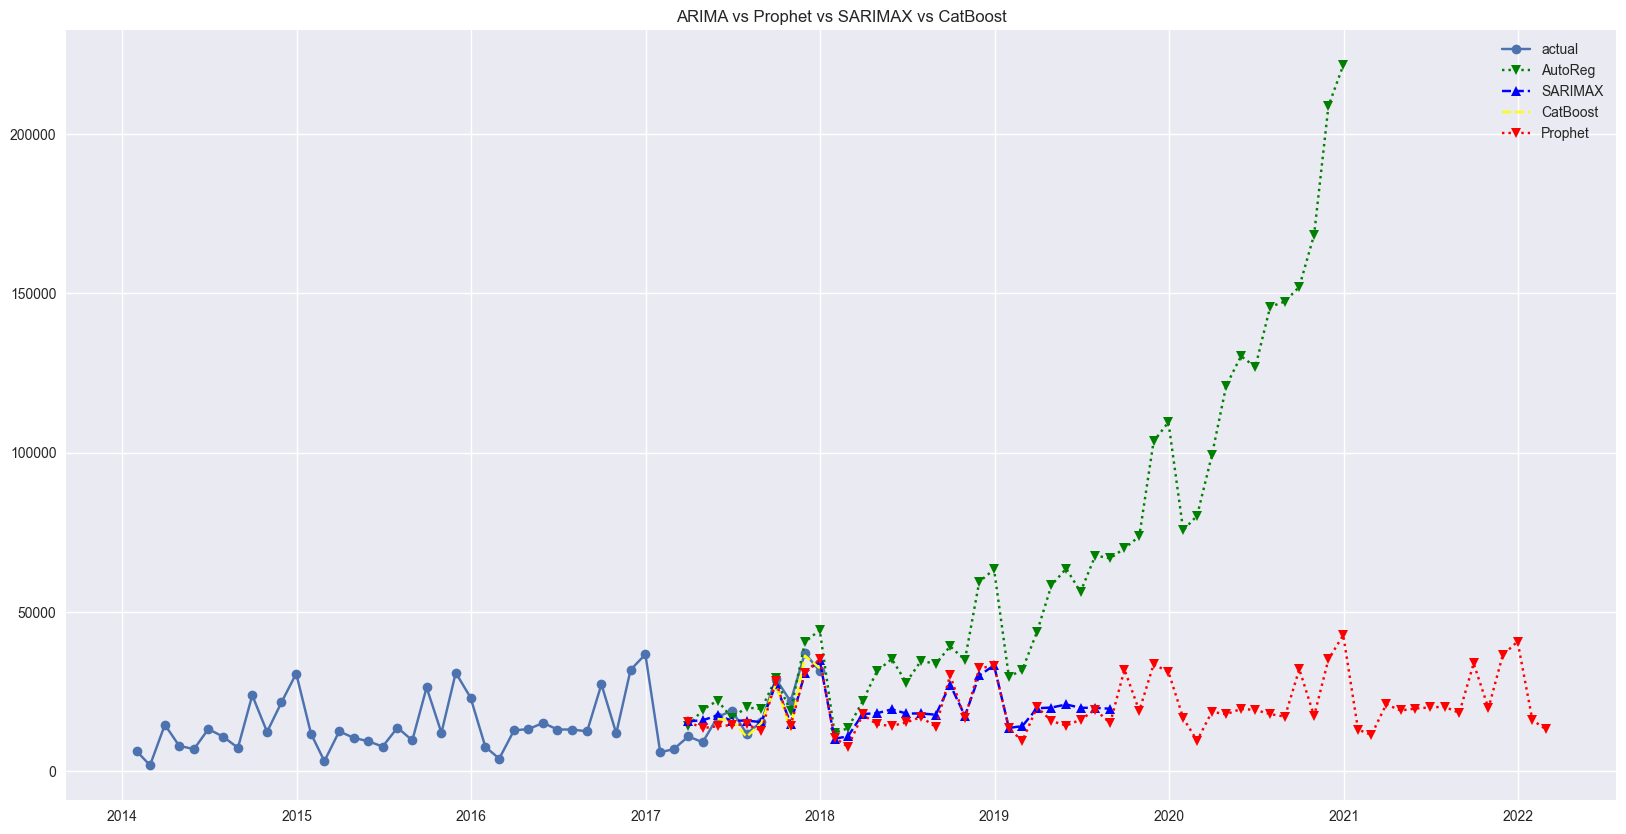

In [91]:
data = df[df.Category == 'Furniture']
data.index = pd.to_datetime(data['Order Date'])
data = data['Sales'].resample('M').sum()
plt.figure(figsize=(20, 10))
plt.plot(data, label='actual', marker='o')
plt.plot(pd.concat((ar_pred_test, ar_pred_future)), marker='v', color='g', linestyle=':', label='AutoReg')
plt.plot(sar_pred_future.index, sar_pred_future, marker='^', color='b', label='SARIMAX', linestyle='--')
plt.plot(data_test['Order Date'], forecast, label='CatBoost', color='yellow', linestyle='--')
plt.plot(pd.concat((forecast_test, forecast_future))['ds'], pd.concat((forecast_test, forecast_future))['yhat'], marker='v', color='r', linestyle=':', label='Prophet')
# plt.plot(triple_exp_fcast, color='r', label= f'TripleExp rmse = {triple_exp_rmse}')
# plt.plot(ar_fcast, color='g', label = f'AutoReg rmse = {ar_rmse}')


plt.legend()
plt.title(f'ARIMA vs Prophet vs SARIMAX vs CatBoost');

In [92]:
rmse_models_list = [moving_average_mae, weighted_moving_average_mae, ar_mae, prophet_mae_test]
rmse_list = pd.Series(
    index = ['Moving_average', 'Weighted_moving_average', 'AutoReg', 'Prophet'], 
    data=rmse_models_list
)

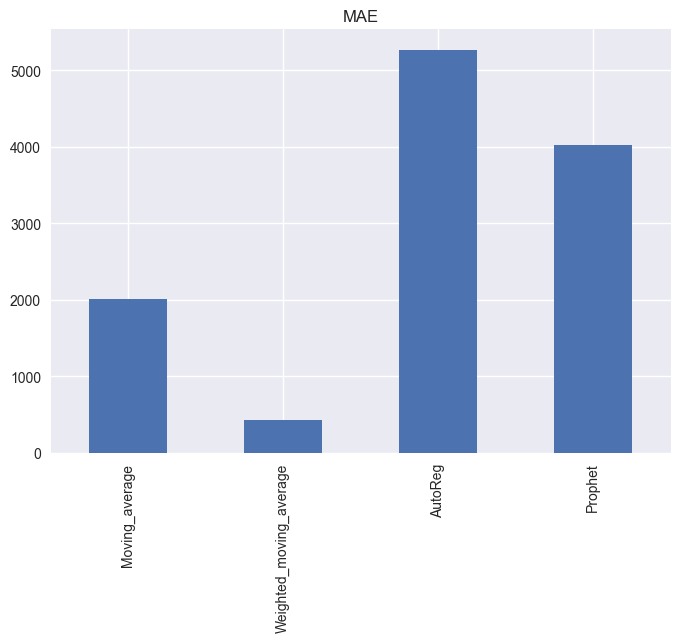

In [93]:
rmse_list.plot.bar()
plt.title('MAE');

9. Создайте Streamlit-приложение, в которое пользователь сможет загрузить свой файл с временным рядом, и получить результат предсказания, а так же метрики и интерпретацию результатов

10*. Если останется время, можно попробовать дополнительно одну из библиотек: 
* [Darts](https://habr.com/ru/articles/659405/)
* [Merlion](https://habr.com/ru/companies/sportmaster_lab/articles/792318/)
* [tsfresh](https://tsfresh.readthedocs.io/en/latest/)
* [Kats](https://github.com/facebookresearch/Kats)
* [autots](https://winedarksea.github.io/AutoTS/build/html/source/tutorial.html)

In [94]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


class DataPreprocessing(BaseEstimator, TransformerMixin):
    def __init__(self, category='Furniture'):
        self.category = category

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

        data = X[X['Category'] == 'Furniture']
        data.index = pd.to_datetime(data['Order Date'])

        return data
    
class AddFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, lags=12):
        self.lags = lags

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        data_monthly = X.resample('M').agg({'Sales': 'sum'})
        data_monthly.index.name = 'Order Date'
        
        data_monthly.reset_index(inplace=True)


        for i in range(1, self.lags + 1):
            data_monthly[f'lag_{i}'] = data_monthly['Sales'].shift(i)

        data_monthly['rolling_mean_3'] = data_monthly['Sales'].rolling(3).mean()
        data_monthly['rolling_mean_6'] = data_monthly['Sales'].rolling(6).mean()
        data_monthly['rolling_mean_12'] = data_monthly['Sales'].rolling(12).mean()

        data_monthly['rolling_std_3'] = data_monthly['Sales'].rolling(3).std()
        data_monthly['rolling_std_6'] = data_monthly['Sales'].rolling(6).std()
        data_monthly['rolling_std_12'] = data_monthly['Sales'].rolling(12).std()

        data_monthly['trend'] = np.arange(len(data_monthly))

        data_monthly['month'] = data_monthly['Order Date'].dt.month
        data_monthly['year'] = data_monthly['Order Date'].dt.year

        data_monthly['is_quarter_end'] = (data_monthly['Order Date'].dt.day == 31) | (data_monthly['Order Date'].dt.day == 30)
        data_monthly['is_holiday'] = (data_monthly['Order Date'].dt.weekday >= 5)  # Выходные

        data_monthly['diff_1'] = data_monthly['Sales'].diff(1)

        data_monthly['pct_change'] = data_monthly['Sales'].pct_change()

        data_monthly['max_6'] = data_monthly['Sales'].rolling(6).max()

        data_monthly['min_6'] = data_monthly['Sales'].rolling(6).min()

        data_monthly['range_6'] = data_monthly['max_6'] - data_monthly['min_6']

        data_monthly['month_encoded'] = data_monthly['month'].astype('category')

        data_monthly['year_encoded'] = data_monthly['year'].astype('category')

        # data_monthly['month_number'] = data_monthly['Order Date'].dt.month

        # data_monthly['year_number'] = data_monthly['year'].astype('category').cat.codes

        for i in range(1, 2):
            data_monthly[f'lag_{i}_mean'] = data_monthly[f'lag_{i}'].rolling(3).mean()
            data_monthly[f'lag_{i}_median'] = data_monthly[f'lag_{i}'].rolling(3).median()
            data_monthly[f'lag_{i}_range'] = data_monthly[f'lag_{i}'].rolling(3).max() - data_monthly[f'lag_{i}'].rolling(3).min()
        data_monthly = data_monthly.drop(columns='Order Date')

        data_monthly.dropna(inplace=True)

        return data_monthly

preprocess_pipeline = Pipeline([
    ('preprocessing', DataPreprocessing(category='Furniture')),
    ('features', AddFeatures(lags=12))
])

# 1. Применяем препроцессинг ко всему датасету
raw_df = df.copy()
features_data = preprocess_pipeline.fit_transform(raw_df)  # возвращает DataFrame с 'Sales' и фичами

# 2. Отделяем X и y
X = features_data.drop(columns=['Sales'])
y = features_data['Sales']

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Категориальные оставляем без изменений
categorical_features = ['month_encoded', 'year_encoded', 'is_quarter_end', 'is_holiday']
# Если 'month' и 'year' у вас числовые (int), не добавляйте их сюда

# Преобразователь: масштабируем только numeric, остальное passthrough
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_features)
], remainder='passthrough')  # остаток (категориальные) без изменений

# 3. Вычисляем ИНДЕКСЫ категориальных колонок после препроцессинга
# После трансформации: первые len(numeric_features) — числовые, остальные — категориальные в исходном порядке
cat_indices = list(range(len(numeric_features), len(numeric_features) + len(categorical_features)))

# 4. Пайплайн модели — cat_features по ИНДЕКСАМ
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CatBoostRegressor(
        iterations=2000,
        learning_rate=0.1,
        depth=1,
        random_seed=42,
        verbose=False,
        eval_metric='MAE',
        cat_features=cat_indices  # ← ИНДЕКСЫ, а не имена!
    ))
])

# 5. (Опционально) Оценка на тесте
train_size = int(0.8 * len(features_data))
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]


# 6. Сохраняем ВСЁ как один объект для будущего использования
full_pipeline = {
    'preprocess': preprocess_pipeline,  # препроцессинг + фичи
    'model': model_pipeline             # scaler + обученная модель
}

model_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


MAE: 2726.06
RMSE: 3569.39
R2: 0.81


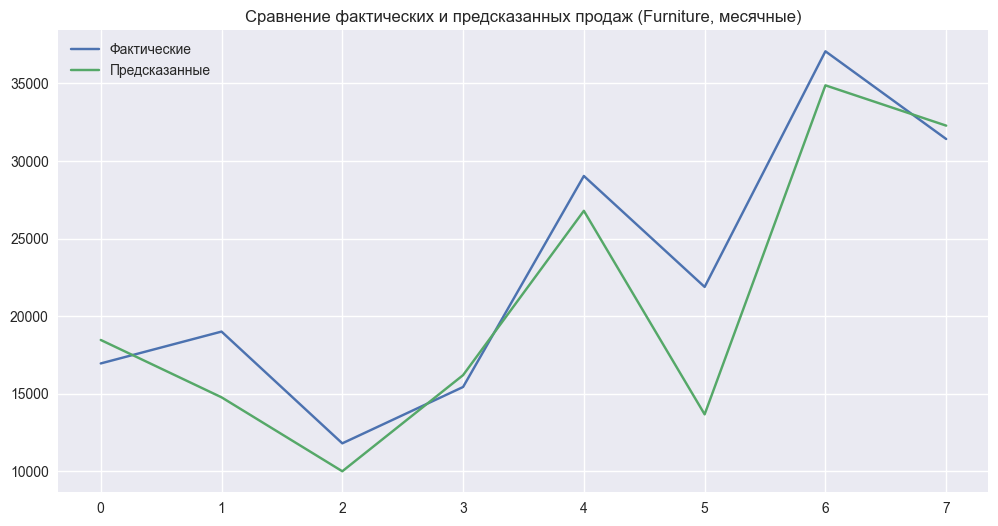

In [95]:
predictions = model_pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Фактические')
plt.plot(predictions, label='Предсказанные')
plt.legend()
plt.title('Сравнение фактических и предсказанных продаж (Furniture, месячные)')
plt.show()

In [96]:
joblib.dump(full_pipeline, 'furniture_forecast_pipeline.pkl')
print("Пайплайн сохранён как 'furniture_forecast_pipeline.pkl'")

Пайплайн сохранён как 'furniture_forecast_pipeline.pkl'


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 
